In [1]:
import time
import os, fnmatch
import numpy as np
import tensorflow as tf
import keras
import matplotlib
import matplotlib.pyplot as plt
from __future__ import print_function

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.layers import Input, InputLayer
from keras.models import Model, Sequential
from keras.layers.core import Dense, Dropout, Activation, Reshape
from keras.datasets import mnist
from keras.optimizers import Adam
from keras import initializers
from keras.layers import Input, Conv2D, Lambda, merge, Dense, Flatten,MaxPooling2D, Conv2DTranspose, BatchNormalization, UpSampling2D, ZeroPadding2D
from keras.regularizers import l2
from keras.layers.advanced_activations import LeakyReLU
import numpy.random as rand
print(matplotlib.__version__)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


2.1.0


In [2]:
# create a list, result, of all file names
def find(pattern, path):
    result = []
    for root, dirs, files in os.walk(path):
        for name in files:
            if fnmatch.fnmatch(name, pattern):
                result.append(os.path.join(root, name))
    return result

result = find('*.jpg', 'lfwfaces')
print("Number of images: " + str(len(result)))
print("Example file name: " + result[0])

Number of images: 100
Example file name: lfwfaces/Adrian_Murrell_0001.jpg


In [3]:
y_train = []

for i in range(len(result)):
    img = load_img(result[i])
    img = img_to_array(img)
    
    # convert from (250, 250, 3) to (256, 256, 3)
    new_img = []
    for j in range(250):
        arr = [[0, 0, 0]]
        arr = np.array(arr)

        vec = np.append(img[j], arr, axis=0)
        vec = np.append(vec, arr, axis=0)
        vec = np.append(vec, arr, axis=0)
        vec = np.append(vec, arr, axis=0)
        vec = np.append(vec, arr, axis=0)
        vec = np.append(vec, arr, axis=0)
        new_img.append(vec)

    new_img.append(vec)
    new_img.append(vec)
    new_img.append(vec)
    new_img.append(vec)
    new_img.append(vec)
    new_img.append(vec)
    new_img = np.array(new_img)
    
    img = (new_img - 127.5) / 127.5
    y_train.append(img)
    
y_train = np.array(y_train)
print(y_train.shape)

(100, 256, 256, 3)


In [4]:
# convert all to_gray

def to_gray(arr):
    output = []
    for img in arr:
        output_img = tf.image.rgb_to_grayscale(img)
        sess = tf.Session()
        with sess.as_default():
            output_img = output_img.eval()
        output.append(output_img)
            
    return output

x_train = to_gray(y_train)

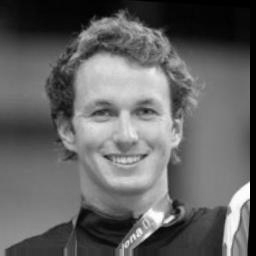

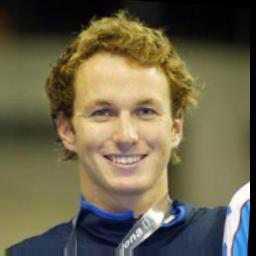

In [5]:
display(array_to_img(x_train[53]))
display(array_to_img(y_train[53]))

In [6]:
x_train = np.array(x_train)

In [7]:
# model

model = Sequential()

# model.add(InputLayer(input_shape=(None, None, 1)))
model.add(InputLayer(input_shape=(256, 256, 1)))

model.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))

model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))

model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))

model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))

model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))

model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))

model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='tanh', padding='same'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 8)       80        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 8)       584       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 16)      1168      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 16)        2320      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        9248      
__________

In [8]:
model.compile(optimizer='rmsprop', loss='mse')
model.fit(x = x_train, y = y_train, batch_size=1, epochs=200)
model.save_weights('recolorization_weights.h5')

Epoch 1/200
100/100 [==============================] - 21s 205ms/step - loss: 0.0834
Epoch 2/200
100/100 [==============================] - 18s 178ms/step - loss: 0.0473
Epoch 3/200
100/100 [==============================] - 17s 170ms/step - loss: 0.0397
Epoch 4/200
100/100 [==============================] - 17s 175ms/step - loss: 0.0363
Epoch 5/200
100/100 [==============================] - 28s 284ms/step - loss: 0.0350
Epoch 6/200
100/100 [==============================] - 27s 274ms/step - loss: 0.0327
Epoch 7/200
100/100 [==============================] - 28s 283ms/step - loss: 0.0313
Epoch 8/200
100/100 [==============================] - 26s 260ms/step - loss: 0.0302
Epoch 9/200
100/100 [==============================] - 25s 251ms/step - loss: 0.0298
Epoch 10/200
100/100 [==============================] - 27s 266ms/step - loss: 0.0290
Epoch 11/200
100/100 [==============================] - 27s 272ms/step - loss: 0.0282
Epoch 12/200
100/100 [==============================] - 24s 236

100/100 [==============================] - 25s 252ms/step - loss: 0.0201
Epoch 97/200
100/100 [==============================] - 22s 219ms/step - loss: 0.0204
Epoch 98/200
100/100 [==============================] - 22s 215ms/step - loss: 0.0204
Epoch 99/200
100/100 [==============================] - 21s 214ms/step - loss: 0.0201
Epoch 100/200
100/100 [==============================] - 21s 214ms/step - loss: 0.0203
Epoch 101/200
100/100 [==============================] - 27s 269ms/step - loss: 0.0200
Epoch 102/200
100/100 [==============================] - 22s 223ms/step - loss: 0.0202
Epoch 103/200
100/100 [==============================] - 22s 217ms/step - loss: 0.0200
Epoch 104/200
100/100 [==============================] - 22s 216ms/step - loss: 0.0204
Epoch 105/200
100/100 [==============================] - 22s 223ms/step - loss: 0.0200
Epoch 106/200
100/100 [==============================] - 23s 226ms/step - loss: 0.0202
Epoch 107/200
100/100 [==============================] - 23s

Epoch 190/200
100/100 [==============================] - 24s 242ms/step - loss: 0.0178
Epoch 191/200
100/100 [==============================] - 23s 234ms/step - loss: 0.0177
Epoch 192/200
100/100 [==============================] - 24s 240ms/step - loss: 0.01780s - loss: 0.
Epoch 193/200
100/100 [==============================] - 23s 227ms/step - loss: 0.0176
Epoch 194/200
100/100 [==============================] - 23s 228ms/step - loss: 0.0177
Epoch 195/200
100/100 [==============================] - 22s 216ms/step - loss: 0.0179
Epoch 196/200
100/100 [==============================] - 23s 227ms/step - loss: 0.0174
Epoch 197/200
100/100 [==============================] - 22s 219ms/step - loss: 0.0176
Epoch 198/200
100/100 [==============================] - 23s 225ms/step - loss: 0.0176
Epoch 199/200
100/100 [==============================] - 23s 230ms/step - loss: 0.0176
Epoch 200/200
100/100 [==============================] - 22s 223ms/step - loss: 0.0179


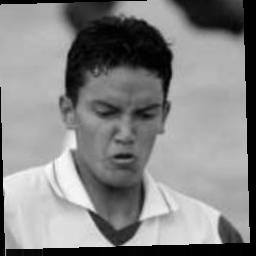

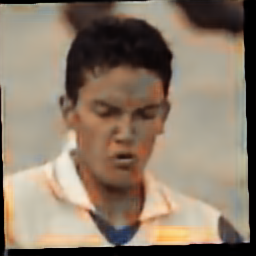

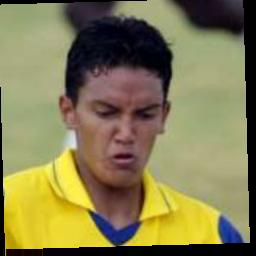

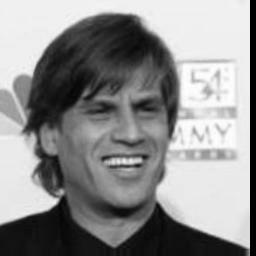

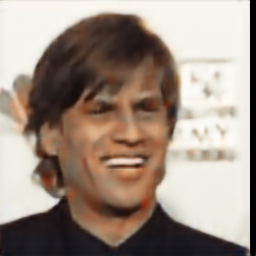

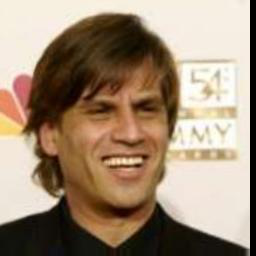

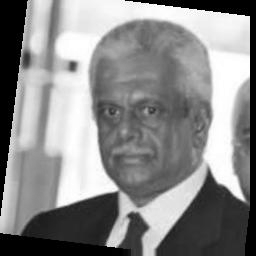

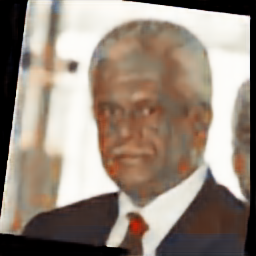

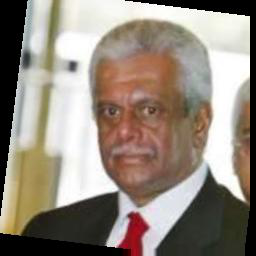

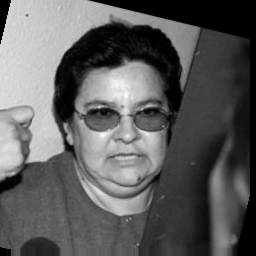

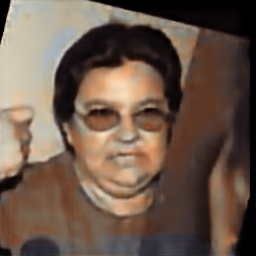

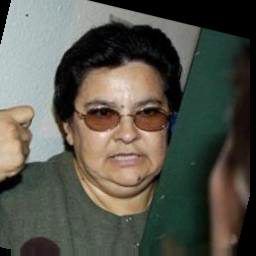

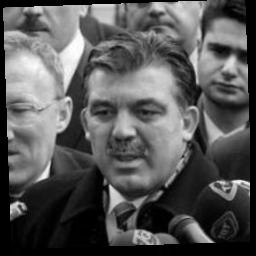

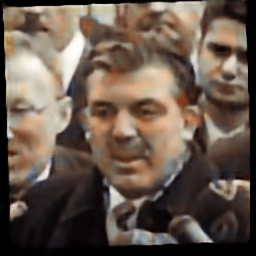

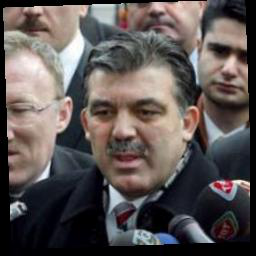

In [9]:
output = model.predict(x_train)

for i in range(5):
    x1 = rand.randint(x_train.shape[0])
    
    display(array_to_img(x_train[x1]))
    display(array_to_img(output[x1]))
    display(array_to_img(y_train[x1]))
    print(" "*1000)